---
# Evaporation Equations
---

In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import numpy.ma as ma
from salishsea_tools import viz_tools, utilities
import datetime
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as colors
%matplotlib inline
import cmocean as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [5]:
color_dict = {"MOHID bunker-C": "darkolivegreen", "MOHID diesel": "indigo", 
             "Bunker_C_MassEvap": "yellowgreen", 
              "Bunker-C (short-term)": "black",  "Bunker-C (long-term)": "grey",
              "Bunker-C (Anchorage, short-term)": "darkolivegreen", 'Bunker-C (Anchorage, long-term)':"yellowgreen",
             "Diesel_MassEvap": "mediumpurple", "Diesel": "mediumpurple",
             "AKNS": "sienna", "MOHID-old akns": "saddlebrown", "Akns_MassEvap":"sienna",
             "MOHID-old diesel": "darkmagenta", 
             "MOHID-old bunker-C": "olivedrab"}

/var/folders/36/r7rkkw2567v70rmk6z0twn6r0000gp/T/ipykernel_10733/431937196.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  time_in_minutes = [np.float(x) for x in range(1,60*24*days,1)]


Text(0.5, 0, 'time [days]')

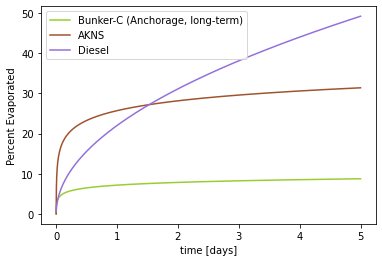

In [6]:
days = 5
time_in_minutes = [np.float(x) for x in range(1,60*24*days,1)]
time_in_days = [
    minutes/(60*24) for minutes in time_in_minutes
    ]
SST = 15

evaporation = {'time':time_in_days, 
      'Bunker-C (Anchorage, long-term)':(0.31 + 0.045 * SST) * np.log(time_in_minutes),
      'AKNS': (2.86 + 0.045 * SST) * np.log(time_in_minutes),
      'Diesel': (0.31 + 0.018 * SST) * np.sqrt(time_in_minutes)
     } 
  
# Create DataFrame 
evaporation_df = pd.DataFrame(evaporation)
evaporation_df = evaporation_df.set_index('time')

# plot evaporation rates
cols_plot = ['Bunker-C (Anchorage, long-term)', 'AKNS', 'Diesel']
ax = evaporation_df[cols_plot].plot(
    linewidth=1.5,
    color = [color_dict.get(column_name,'#333333') for column_name in cols_plot]
)
ax.set_ylabel('Percent Evaporated')
ax.set_xlabel('time [days]')

/var/folders/36/r7rkkw2567v70rmk6z0twn6r0000gp/T/ipykernel_10733/3387763329.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  time_in_minutes = [np.float(x) for x in range(1,60*24*days,1)]


Text(0.5, 0, 'time [days]')

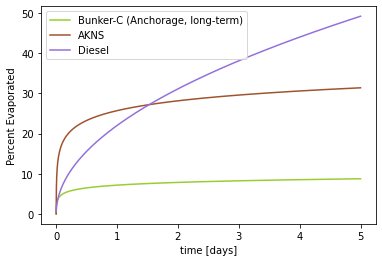

In [35]:
days = 7
time_in_minutes = [np.float(x) for x in range(1,60*24*days,1)]
time_in_days = [
    minutes/(60*24) for minutes in time_in_minutes
    ]
SST = 15

evaporation = {'time':time_in_days, 
      'Bunker-C (Anchorage, long-term)':(0.31 + 0.045 * SST) * np.log(time_in_minutes),
      'AKNS': (2.86 + 0.045 * SST) * np.log(time_in_minutes),
      'Diesel': (0.31 + 0.018 * SST) * np.sqrt(time_in_minutes)
     } 
  
# Create DataFrame 
evaporation_df = pd.DataFrame(evaporation)
evaporation_df = evaporation_df.set_index('time')
evaporation_fraction={}
# plot evaporation rates
cols_plot = ['Bunker-C (Anchorage, long-term)', 'AKNS', 'Diesel']

ax = evaporation_df[cols_plot].plot(
    linewidth=1.5,
    color = [color_dict.get(column_name,'#333333') for column_name in cols_plot]
)
ax.set_ylabel('Percent Evaporated')
ax.set_xlabel('time [days]')

# Evaluation time frame of evaporated 

In [38]:
evaporation_fraction={}
for col in cols_plot:
    evaporation_fraction[col] = np.asarray(evaporation_df[col].to_list())
    evaporation_fraction[col]=evaporation_fraction[col]/evaporation_fraction[col][-1]
    
ef = pd.DataFrame(evaporation_fraction)

Text(0.5, 0, 'time [days]')

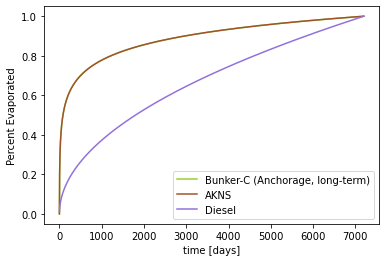

In [39]:
cols_plot = ['Bunker-C (Anchorage, long-term)', 'AKNS', 'Diesel']
ax = ef[cols_plot].plot(
    linewidth=1.5,
    color = [color_dict.get(column_name,'#333333') for column_name in cols_plot]
)
ax.set_ylabel('Percent Evaporated')
ax.set_xlabel('time [days]')

In [ ]:
#print days for 90% of ANS eva

In [49]:
time_in_days[np.where(ef['AKNS']>.9)[0][0]]

2.0569444444444445

In [ ]:
# Show percent of 7-day evaporation by oil type

In [57]:
np.where(np.asarray(time_in_days)>2)[0][0]

2880

In [62]:
for day in [1,2,3]:
    print(f'Percent evaporated after {day}-day')
    for col in cols_plot:
        print(f'{ef[col][np.where(np.asarray(time_in_days)>day)[0][0]]:.2f} {col}')

Percent evaporated after 1-day
0.82 Bunker-C (Anchorage, long-term)
0.82 AKNS
0.45 Diesel
Percent evaporated after 2-day
0.90 Bunker-C (Anchorage, long-term)
0.90 AKNS
0.63 Diesel
Percent evaporated after 3-day
0.94 Bunker-C (Anchorage, long-term)
0.94 AKNS
0.77 Diesel
